In [2]:
#필요한 모듈 import 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.metrics import *
from pandas import DataFrame, Series

plt.style.use('seaborn')
sns.set(font_scale=2.5)

In [3]:
#각자 다운로드 받은 경로로 설정하여 데이터 로드
df_train=pd.read_csv(r'\Users\1868j\Downloads\titanic\train.csv')
df_test=pd.read_csv(r'\Users\1868j\Downloads\titanic\test.csv')

In [4]:
#데이터 모양 및 feature 정보 조회 
df_train.shape, df_test.shape

((891, 12), (418, 11))

In [5]:
#변수명 확인 
columns=df_train.columns
columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
#Target value(y)로 사용할 칼럼 'Survived'의 클래스 별 데이터 수 
df_train['Survived'].value_counts() 

0    549
1    342
Name: Survived, dtype: int64

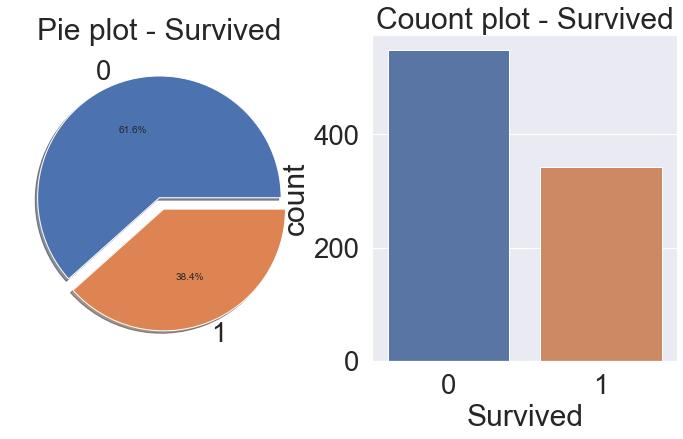

In [9]:
#'Survived'열 시각화
f, ax=plt.subplots(1,2,figsize=(12,6))
df_train["Survived"].value_counts().plot.pie(explode=[0,0.1],autopct="%1.1f%%",
                                            ax=ax[0],shadow=True)
ax[0].set_title("Pie plot - Survived")
ax[0].set_ylabel('')
sns.countplot("Survived",data=df_train,ax=ax[1])
ax[1].set_title("Couont plot - Survived")
plt.show()

In [10]:
# 학습에 불필요한 컬럼 제거 
train=df_train.drop(['PassengerId','Name','Ticket','Cabin','Embarked'],axis=1)
test=df_test.drop(['Cabin','Embarked','Name','Ticket'],axis=1)

#결측치, null값 제거
#1.성별에 따른 평균나이를 결측값에 채워줌.
train["Age"].fillna(train.groupby("Sex")["Age"].transform("mean"),inplace=True)
test["Age"].fillna(test.groupby("Sex")["Age"].transform("mean"),inplace=True)
#2 성별에 따른 탑승요금의 중앙값을 결측값에 채워줌
test["Fare"].fillna(test.groupby("Sex")["Fare"].transform("median"),inplace=True)

#문자열로 이루어진 성별 컬럼은 숫자로 매핑
sex_mapping={"male":0,"female":1}
train['Sex']=train['Sex'].map(sex_mapping)
test['Sex']=test["Sex"].map(sex_mapping)

#더 좋은 학습을 위하여 평균을 기준으로 3 시그마 편차 내에 포함 되지 않는 값은 이상치로 판단하여여 모두 제거 
#1'Age' 변수에 적용
age_mean=train['Age'].mean()
age_std=train['Age'].std()
indexNames=train[train['Age']<age_mean-3*age_std].index
train.drop(indexNames,inplace=True)
indexNames=train[train["Age"]>age_mean+3*age_std].index
train.drop(indexNames,inplace=True)
#2 'Fare' 변수에 적용
fare_mean=train['Fare'].mean()
fare_std=train['Fare'].std()
indexNames=train[train['Fare']<age_mean-3*age_std].index
train.drop(indexNames,inplace=True)
indexNames=train[train["Fare"]>age_mean+3*age_std].index
train.drop(indexNames,inplace=True)



In [11]:
#'Survived'열을 target label로 지정
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.model_selection import train_test_split

X_train=train.drop('Survived',axis=1).values
target_label=train['Survived'].values
X_test=test.values

In [12]:
#질문 왜 train값 행값이 다르게 나오지.....?? 
X_train.shape, X_test.shape

((771, 6), (418, 7))

In [13]:
#기존의 train set을 train set과 validation set을 나눈 후 로지스틱 회귀 모형 학습  
X_tr, X_vid, y_tr, y_vid=train_test_split(X_train,target_label,test_size=0.2,random_state=2020)
y_tr.shape,y_vid.shape

model=LogisticRegression()
model.fit(X_tr,y_tr)
prediction=model.predict(X_vid)
prediction

C:\Users\1868j\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


array([1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0], dtype=int64)

In [14]:
#학습에 사용된 인원 수와 생존 여부 예측 정확도 및 confusion matrix
print('Number of people:{} \naccuracy : {:.2f}%'.format(y_vid.shape[0],100*accuracy_score(y_vid,prediction)))
confusion_matrix(y_vid,prediction)
#Precision, recall, f1-score 모두 도출 
print('Precision:{:.2f}% \nRecall: {:.2f}% \nF1-score:{:.2f}%'.format(100*precision_score(y_vid,prediction),
                                                                     100*recall_score(y_vid,prediction),
                                                                     100*f1_score(y_vid,prediction)))

Number of people:155 
accuracy : 75.48%
Precision:65.38% 
Recall: 62.96% 
F1-score:64.15%


In [17]:
list=[]
for i in np.linspace(0,1,100):
    pred=model.predict_proba(X_vid)[:,1]> i 
    cf_mtx=confusion_matrix(y_vid,pred)
    acc=accuracy_score(y_vid,pred)
    tpr=cf_mtx[0,0]/cf_mtx[0].sum()
    fpr=cf_mtx[1,0]/cf_mtx[1].sum()
    f1=f1_score(y_vid,pred)
    list.append([i,acc,f1,tpr,fpr])
    
cut_off=DataFrame(list)
cut_off.columns=["CUTOFF","ACC","F1","TPR","FPR"]
cut_off

C:\Users\1868j\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\1868j\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\1868j\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\1868j\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_f

,CUTOFF,ACC,F1,TPR,FPR
0,0.000000,0.348387,0.516746,0.000000,0.000000
1,0.010101,0.348387,0.516746,0.000000,0.000000
2,0.020202,0.348387,0.516746,0.000000,0.000000
3,0.030303,0.348387,0.516746,0.000000,0.000000
4,0.040404,0.361290,0.521739,0.019802,0.000000
...,...,...,...,...,...
95,0.959596,0.658065,0.036364,1.000000,0.981481
96,0.969697,0.651613,0.000000,1.000000,1.000000
97,0.979798,0.651613,0.000000,1.000000,1.000000
98,0.989899,0.651613,0.000000,1.000000,1.000000


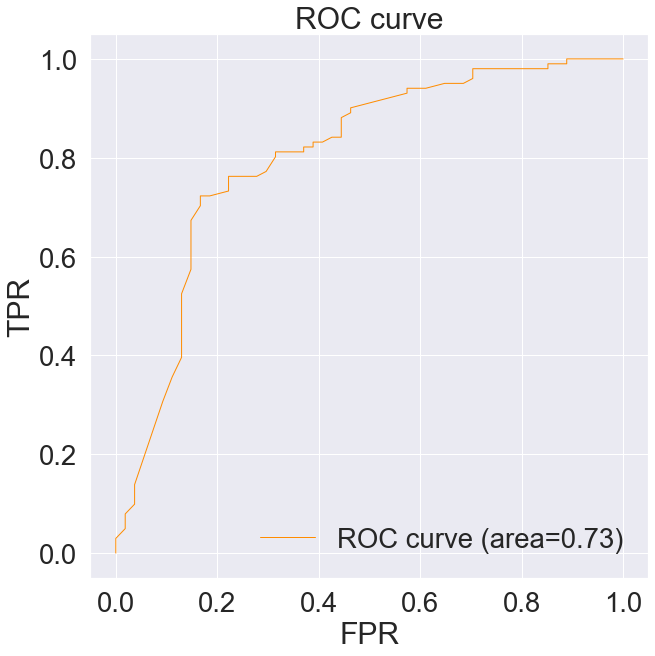

In [18]:
from sklearn.metrics import roc_curve, auc
fpr,tpr,thresholds=roc_curve(y_vid,prediction)
roc_auc=auc(fpr,tpr)
plt.figure(figsize=(10,10))
plt.plot(cut_off["FPR"],cut_off["TPR"],color="darkorange",lw=1,label="ROC curve (area=%.2f)" %roc_auc )
plt.title("ROC curve")
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.legend(loc="lower right")

In [21]:
#1.Accuracy(ACC)가 최대가 되는 값 
cut_off[cut_off["ACC"]==cut_off["ACC"].max()]

,CUTOFF,ACC,F1,TPR,FPR
61,0.616162,0.774194,0.623656,0.90099,0.462963


In [31]:
cut_off_ACC_MAX=cut_off[cut_off["ACC"]==cut_off["ACC"].max()]["CUTOFF"][61]
cut_off_ACC_MAX
                        

0.6161616161616162

In [32]:
pred_ACC_MAX=model.predict_proba(X_vid)[:,1]> cut_off_ACC_MAX

In [37]:
model.predict_proba(X_vid)[:,0]

array([0.44329304, 0.30248358, 0.8772627 , 0.26356141, 0.85108251,
       0.82534433, 0.69075035, 0.36818816, 0.89985937, 0.43129068,
       0.3801616 , 0.03286744, 0.31757778, 0.76670644, 0.86872146,
       0.72464036, 0.90490148, 0.90528088, 0.20798907, 0.57429265,
       0.91702641, 0.89946067, 0.29778587, 0.69075035, 0.0720943 ,
       0.90156682, 0.90202139, 0.44603724, 0.85063333, 0.3935582 ,
       0.13211173, 0.88147797, 0.1409808 , 0.90563836, 0.95267565,
       0.93792117, 0.81890497, 0.9009714 , 0.24005987, 0.89946067,
       0.87400341, 0.38089282, 0.89802139, 0.90028856, 0.38007723,
       0.63347877, 0.70376593, 0.76523846, 0.55977614, 0.39785315,
       0.47050959, 0.91291587, 0.84031606, 0.55977614, 0.57359902,
       0.55371906, 0.88509228, 0.56365448, 0.90029936, 0.23207275,
       0.88263966, 0.86585346, 0.40997521, 0.28931766, 0.90407632,
       0.62319962, 0.89385743, 0.90017073, 0.85711658, 0.89515265,
       0.89240105, 0.92792958, 0.33892927, 0.85457512, 0.85255

In [38]:
confusion_matrix(y_vid,pred_ACC_MAX)

array([[91, 10],
       [25, 29]], dtype=int64)

In [39]:
#2. F1-score가 최대가 되는 값
cut_off[cut_off["F1"]==cut_off["F1"].max()]


,CUTOFF,ACC,F1,TPR,FPR
28,0.282828,0.76129,0.708661,0.722772,0.166667
29,0.292929,0.76129,0.708661,0.722772,0.166667
